In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [9]:
df = pd.read_csv('dataset_machine_learning.csv')
df

,Unnamed: 0,date,price,bedrooms,bathrooms,toilet,sqm_living,sqm_lot,floors,waterfront,...,grade,yr_built,renovated,yr_renovated,zipcode,city,lat,long,sqm_living15,sqm_lot15
0,9596,2014-05-02,790000,3,2.50,True,241.55,441.29,1.0,False,...,9,1951,False,NaN,98117,Seattle,47.6833,-122.400,221.11,441.29
1,20602,2014-05-02,555000,4,2.50,True,307.51,603.87,2.0,False,...,8,2012,False,NaN,98065,Snoqualmie,47.5150,-121.870,221.11,464.52
2,11577,2014-05-02,440000,4,2.25,True,200.67,754.28,1.0,False,...,8,1966,False,NaN,98006,Bellevue,47.5443,-122.177,171.87,836.13
3,20559,2014-05-02,295000,2,2.50,True,151.43,127.09,2.0,False,...,7,2009,False,NaN,98106,Seattle,47.5489,-122.363,147.72,214.23
4,18690,2014-05-02,470000,5,2.50,True,205.32,896.98,1.0,False,...,8,1976,False,NaN,98011,Bothell,47.7698,-122.222,193.24,802.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19251,7898,2015-05-14,183000,3,1.00,True,108.70,680.05,1.0,False,...,7,1962,False,NaN,98188,Seattle,47.4685,-122.282,189.52,680.05
19252,928,2015-05-14,359000,2,2.75,True,127.28,105.91,2.0,False,...,8,2009,False,NaN,98133,Seattle,47.7052,-122.343,127.28,101.26
19253,5637,2015-05-15,450000,5,2.00,True,173.73,682.28,1.5,False,...,7,1960,False,NaN,98007,Bellevue,47.5951,-122.144,173.73,710.71
19254,13053,2015-05-24,445500,2,1.75,True,129.14,619.66,1.0,False,...,6,1941,False,NaN,98115,Seattle,47.6914,-122.308,85.47,592.72


In [5]:
df_water = df.loc[df['waterfront'] == 1,:]
df_water

,Unnamed: 0,date,price,bedrooms,bathrooms,toilet,sqm_living,sqm_lot,floors,waterfront,...,grade,yr_built,renovated,yr_renovated,zipcode,city,lat,long,sqm_living15,sqm_lot15
306,19971,2014-05-08,988500,3,2.75,True,187.20,1561.42,2.0,True,...,9,2007,False,NaN,98166,Seattle,47.4500,-122.377,165.37,1143.64
414,4013,2014-05-09,2400000,3,2.25,True,278.71,1083.71,1.5,True,...,11,2001,False,NaN,98075,Sammamish,47.5884,-122.086,278.71,1482.64
448,2075,2014-05-12,1200000,3,1.75,True,144.93,750.47,1.5,True,...,6,1928,False,NaN,98040,Mercer Island,47.5779,-122.246,268.49,1552.41
451,14187,2014-05-12,947500,3,2.75,True,276.85,2521.76,1.5,True,...,8,1917,False,NaN,98166,Seattle,47.4522,-122.378,175.59,1162.59
1211,4486,2014-05-24,2000000,5,4.00,True,425.50,412.77,3.0,True,...,10,2004,False,NaN,98075,Sammamish,47.5682,-122.059,251.77,412.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18017,18597,2015-04-22,570000,1,1.00,True,66.89,700.49,1.0,True,...,6,1905,False,NaN,98198,Seattle,47.3509,-122.323,104.05,904.50
18035,12613,2015-04-22,2000000,3,2.50,True,324.23,1956.91,1.0,True,...,10,1968,False,NaN,98074,Sammamish,47.6092,-122.073,165.37,1416.21
18756,1417,2015-05-03,1175000,2,2.50,True,164.44,664.72,2.0,True,...,8,1957,True,2004.0,98155,Seattle,47.7345,-122.285,223.90,973.25
19029,8978,2015-05-07,1075000,2,3.25,True,144.00,164.16,3.0,True,...,8,2006,False,NaN,98075,Sammamish,47.5684,-122.060,251.77,319.96


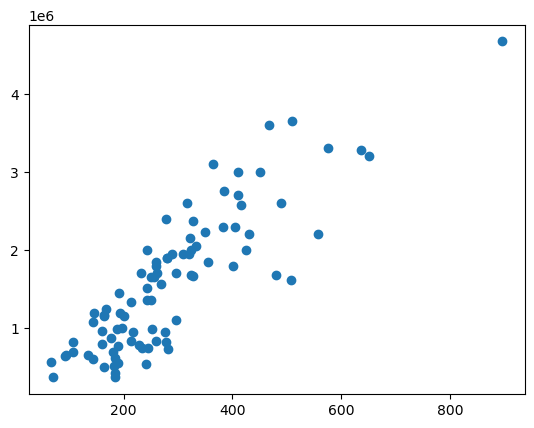

In [6]:
X = df_water["sqm_living"].values.reshape(-1, 1)
y = df_water["price"]

plt.scatter(X,y)

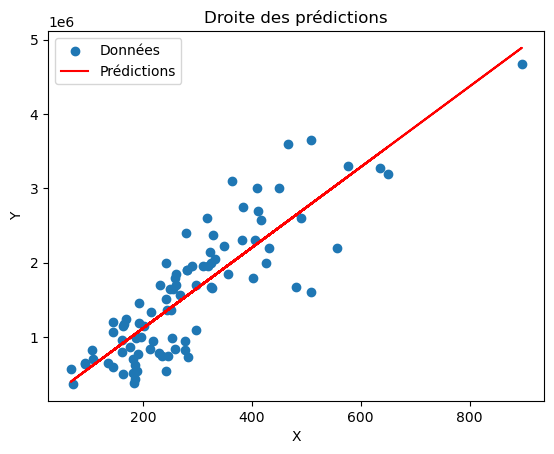

In [7]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
plt.scatter(X, y, label='Données')

plt.plot(X, predictions, color='red', label='Prédictions')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Droite des prédictions')
plt.legend()

plt.show()

In [12]:
a = model.score(X, y)
a

0.7348996808591088

In [38]:
cross_val_score(model, X, y, scoring = 'neg_root_mean_squared_error').mean()

-459868.8522019811

Ce modèle de régression linéaire est très peu performant

In [10]:
def R2(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return(1 - u/v)

In [11]:
score = R2(y, predictions)
score

0.7348996808591088

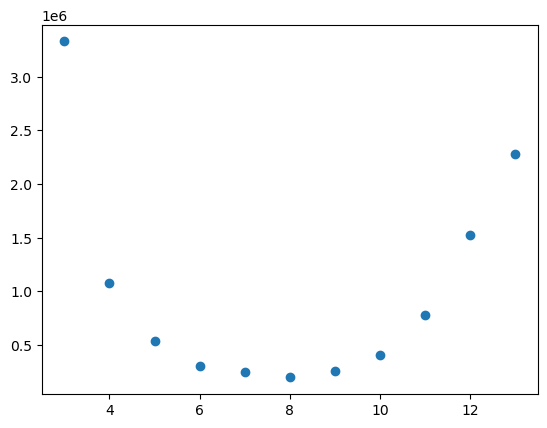

In [24]:
X = df['grade'].unique()
y = df.groupby('grade')['price'].mean()

plt.scatter(X, y)

model = PolynomialFeatures(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model.fit(X_train, y_train)

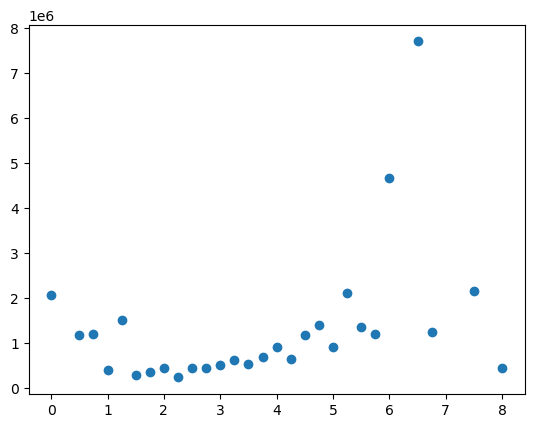

In [15]:
X = df['bathrooms'].unique()
y = df.groupby('bathrooms')['price'].mean()

plt.scatter(X, y)